In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from sklearn.cluster import KMeans

In [103]:
#import data
df = pd.read_csv('kmeanstutorial.csv')

In [104]:
df = df[['team','type','location','pass_end_location']]

In [105]:
df = df[(df['team']=='France')&(df['type']=='Pass')].reset_index()

In [106]:
df[['x','y']] = df.location.str.split(expand=True)
df[['endX','endY']] = df.pass_end_location.str.split(expand=True)

In [107]:
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1:-1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0:-1]).astype(float)
df['endX'] = df.loc[:,'endX'] = df.endX.map(lambda x: x[1:-1]).astype(float)
df['endY'] = df.loc[:,'endY'] = df.endY.map(lambda x: x[0:-1]).astype(float)
df = df.drop(['location','pass_end_location'],axis=1)

In [108]:
X = np.array(df[['x','y','endX','endY']])

kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [109]:
df.head()

,index,team,type,x,y,endX,endY,cluster
0,11,France,Pass,48.0,50.0,48.0,60.0,0
1,24,France,Pass,49.0,80.0,46.0,61.0,0
2,25,France,Pass,65.0,64.0,66.0,69.0,0
3,28,France,Pass,63.0,73.0,65.0,79.0,0
4,29,France,Pass,58.0,79.0,26.0,69.0,0


In [110]:
df.cluster.value_counts()

0    41
1    40
6    38
8    31
3    31
7    28
2    26
9    25
4    18
5    14
Name: cluster, dtype: int64

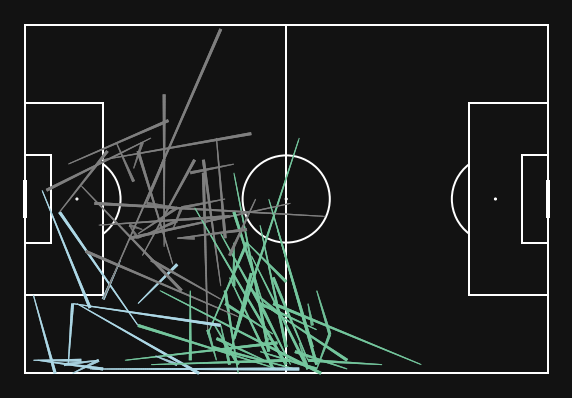

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#121212')
ax.patch.set_facecolor('#121212')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',
             pitch_color='#121212',line_color='white',figsize=(10,10),
             constrained_layout=False,tight_layout=True,view='full')

pitch.draw(ax=ax)

for x in range(len(df['cluster'])):
    
    if df['cluster'][x] == 0:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)

    if df['cluster'][x] == 3:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#7f7f7f',lw=3,zorder=2,comet=True,ax=ax)
        
    if df['cluster'][x] == 5:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#add8e6',lw=3,zorder=2,comet=True,ax=ax)